<a href="https://colab.research.google.com/github/ddenebb/programacio_numerica/blob/main/Tasca_M3_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install polars


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 13.6 MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Exercise 1

Download the data set Airlines Delay: Airline on-time statistics and delay causes and load it into a Pandas Dataframe. Explore the data it contains, briefly explain which variables are there and stick only to the columns you consider relevant. Justify your choice.

### Important

The dimension of the dataset must be randomly reduced in order to obtain a 200,000 record only version. All exercises should be done on this reduced dataset.

Interesting article:
https://towardsdatascience.com/performing-data-analytics-on-the-flights-delay-dataset-using-the-polars-library-284f385cc497

Reducing size:https://www.skytowner.com/explore/reducing_dataframe_memory_size_in_pandas


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
df = pd.read_csv(path)
print(df.info(memory_usage='deep'))

df = df.sample(n=200000)
df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
786588,2607057,2008,5,29,4,1147.0,1115,1259.0,1228,UA,...,5.0,9.0,0,N,0,31.0,0.0,0.0,0.0,0.0
374490,1180733,2008,3,4,2,1616.0,1555,1955.0,1950,WN,...,6.0,7.0,0,N,0,NaN,NaN,NaN,NaN,NaN
989448,3316512,2008,6,26,4,1542.0,1526,1711.0,1700,EV,...,4.0,22.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1870592,6830505,2008,12,23,2,1504.0,1430,1708.0,1625,MQ,...,4.0,36.0,0,N,0,12.0,0.0,9.0,0.0,22.0
1836096,6739984,2008,12,16,2,1334.0,1303,2238.0,2133,DL,...,95.0,18.0,0,N,0,18.0,0.0,34.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620956,5910678,2008,10,19,7,1108.0,1058,1227.0,1212,CO,...,13.0,31.0,0,N,0,10.0,0.0,5.0,0.0,0.0
1340576,4510785,2008,8,13,3,1722.0,1645,2006.0,1940,US,...,8.0,11.0,0,N,0,26.0,0.0,0.0,0.0,0.0
106870,342096,2008,1,4,5,1528.0,1450,1606.0,1544,EV,...,3.0,14.0,0,N,0,22.0,0.0,0.0,0.0,0.0
1452688,4972907,2008,9,21,7,746.0,725,1005.0,938,YV,...,3.0,24.0,0,N,0,0.0,0.0,6.0,0.0,21.0


### - Exercise 2

Do a full dataset report:

    Statistically summarize the dataset and columns of interest. Do a statistical analysis of what you consider relevant.
    Find how much missing data there is per column.
    Create new columns (average flight speed, whether it was late or not...).
    Make a table of the airlines with the most accumulated delays.
    What are the longest flights? And the most delayed? Look for the longest routes and those with the most delays.
    Contribute what you consider relevant.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: ignored

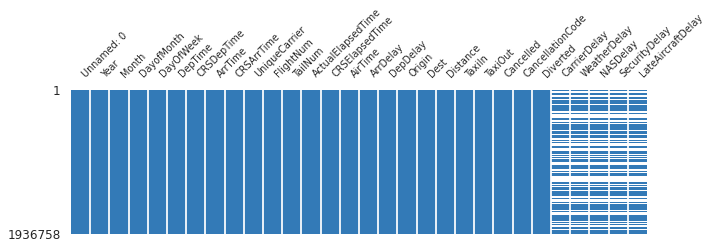

In [15]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

pandas_profiling.__version__

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 3/data/DelayedFlights.csv"
data = pd.read_csv(path)
data.head()

profile = ProfileReport(data, title="Flight Delays", html={'style': {'full_width': True}}, sort="ascending")

profile.to_notebook_iframe()


'3.4.0'

### - Exercise 3

Export the dataset clean and with the new columns to Excel.